# Test Field

In [112]:
import datetime
import re
from typing import List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from sklearn.utils import resample

In [134]:
import final_func as fn
import importlib
importlib.reload(fn)

<module 'final_func' from '/Users/andrewmo/Documents/Docs - Jupiter/Projects/Class Individuals/2022Spring_Finals/final_func.py'>

In [116]:
# Load data
pit = pd.read_csv('data/pit_stops.csv')
results = pd.read_csv('data/results.csv')
status = pd.read_csv('data/status.csv')

In [117]:
# Process the data files
merge_df = fn.merge_data([pit, results, status])
merge_df = fn.process_data(merge_df)
df_dict = fn.pit_stop_group(merge_df)

----------------------------------------------------------------------------------------
Total Pit Stops:  1
No.  1  pit stop:  mean =  0.416  std =  0.147
    66.9% within mean ± 1 std
    95.7% within mean ± 2 std


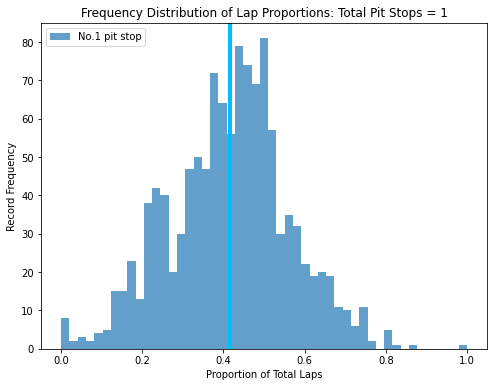

----------------------------------------------------------------------------------------
Total Pit Stops:  2
No.  1  pit stop:  mean =  0.252  std =  0.118
    71.7% within mean ± 1 std
    95.8% within mean ± 2 std
No.  2  pit stop:  mean =  0.62  std =  0.134
    72.9% within mean ± 1 std
    93.1% within mean ± 2 std


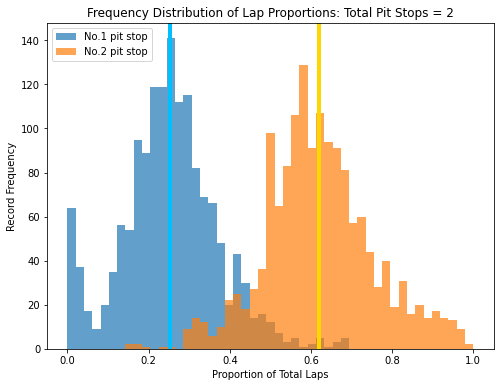

----------------------------------------------------------------------------------------
Total Pit Stops:  3
No.  1  pit stop:  mean =  0.174  std =  0.098
    66.6% within mean ± 1 std
    97.5% within mean ± 2 std
No.  2  pit stop:  mean =  0.427  std =  0.155
    74.4% within mean ± 1 std
    92.6% within mean ± 2 std
No.  3  pit stop:  mean =  0.698  std =  0.13
    74.9% within mean ± 1 std
    93.9% within mean ± 2 std


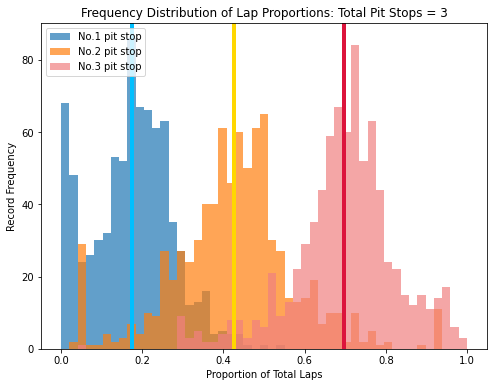

In [130]:
fn.distribution_plot(df_dict)

In [ ]:
def get_err_mean(mg_df: pd.DataFrame):
    avg_err = pd.DataFrame(mg_df.groupby(['raceId', 'driverId'])['abs_err'].mean())
    avg_err = avg_err.add_suffix('_mean').reset_index()
    select_columns = ['raceId', 'driverId', 'positionOrder', 'abs_err_mean']
    test_df = mg_df.merge(avg_err, on=['raceId', 'driverId'])[select_columns]
    test_df = test_df.drop_duplicates()
    top_number = 5
    _df_front = test_df[test_df['positionOrder'] <= top_number]['abs_err_mean']
    _df_back = test_df[test_df['positionOrder'] > top_number]['abs_err_mean']
    return _df_front, _df_back

In [120]:
df_front, df_back = fn.front_back_division(merge_df) # top 5

----------------------------------------------------------------------------------------
Total Pits: 1, no.1 pit, p value=0.6120208311353951


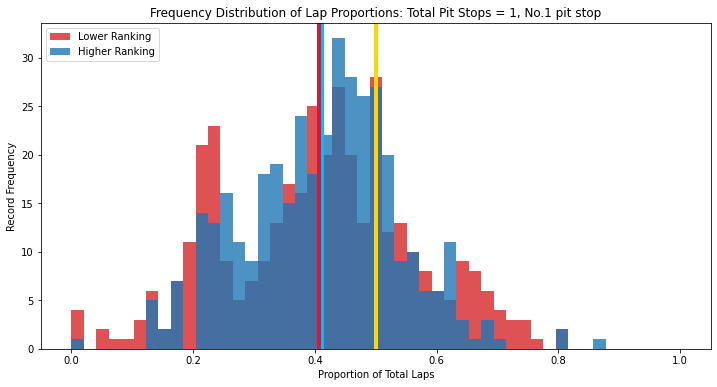

----------------------------------------------------------------------------------------
Total Pits: 2, no.1 pit, p value=0.06260995721012505


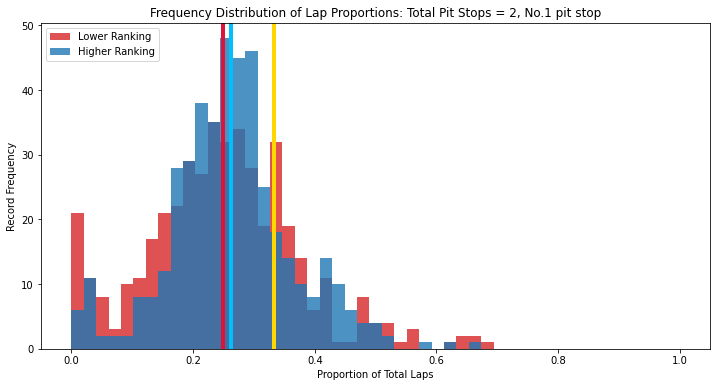

----------------------------------------------------------------------------------------
Total Pits: 2, no.2 pit, p value=0.2175452218698461


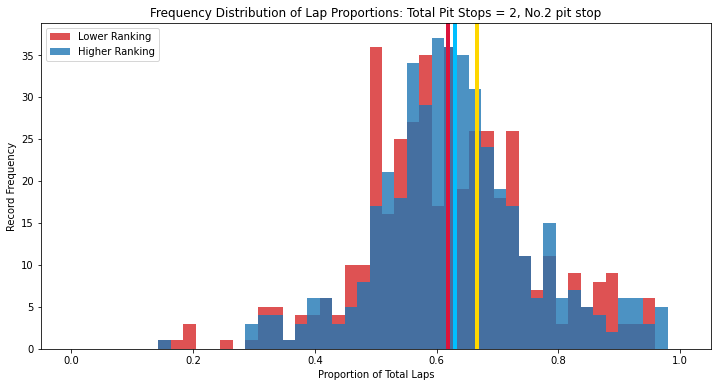

----------------------------------------------------------------------------------------
Total Pits: 3, no.1 pit, p value=0.045088810955493594


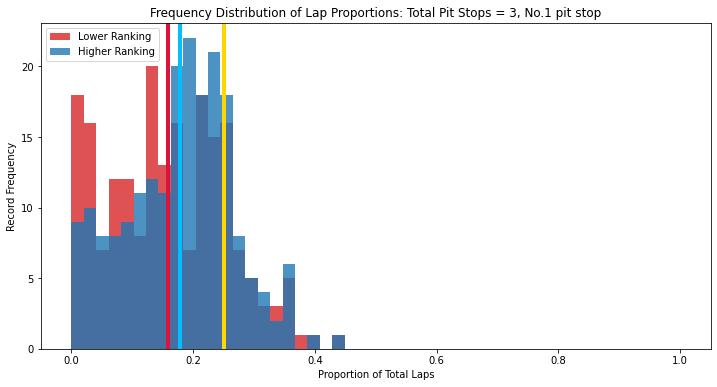

----------------------------------------------------------------------------------------
Total Pits: 3, no.2 pit, p value=0.005040876100088418


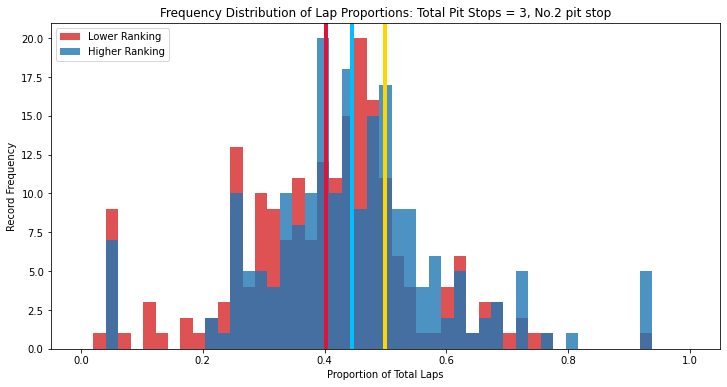

----------------------------------------------------------------------------------------
Total Pits: 3, no.3 pit, p value=0.0004646569255695769


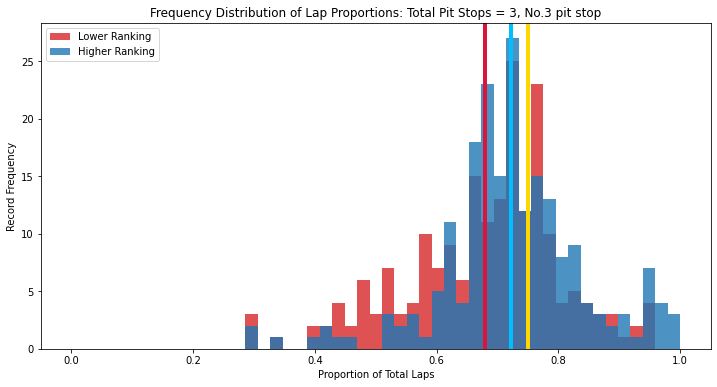

In [135]:
fn.comparison_plot(df_front,df_back)